<a href="https://colab.research.google.com/github/cdsalazard/Modelo_de_Ising_Analisis_de_Redes_Cerebro/blob/main/Ising_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Primero conectemos la maquina virtual con el drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
pip install nilearn

     |████████████████████████████████| 10.0 MB 2.5 MB/s 


In [ ]:
cd /gdrive/Shareddrives/GENSyR /Neurofísica/Proyecto lesiones

/gdrive/Shareddrives/GENSyR /Neurofísica/Proyecto lesiones


In [ ]:
ls

 AAL.csv
 AAL_space-MNI152NLin6_res-1x1x1.nii.gz
'Conectividad funcional'/
'Copia de Redes Estructurales y funcionales- Hubs.ipynb'
 estructural_hammersmith.npy
 funcional_hammersmith.npy
 Hammersmith.csv
 initial_condition.bin
'Ising - Entropia '/
 M2final.npy
 Mfinal.npy
'Redes Estructurales y funcionales- Hubs.ipynb'
'Redes Funcionales - Hubs.ipynb'
 restingstate_functionalconnectivity.npy
 Tractografia/
'Untitled0 (1).ipynb'
 Untitled0.ipynb


##Aqui definimos la función para la entropia

##AQUI SE DEFINE LA FUNCIÓN METROPOLIS

In [ ]:
def metropolis(graf, iteraciones, acople, estruct, T, retirar):

  resistencia = 12 #definimos la constante de la que depende el costo intrínseco de activación de cada parcela 
  inicio = time.time()
  time_series = np.zeros((len(graf.nodes()),iteraciones))#array en el que llenaremos las series de tiempo
  E = np.zeros(iteraciones) # array que llenaremos con las energias
  low = 0
  suma = 0
  # iteremos
  for i in range(iteraciones):
      if i%500 == 0 and i != 0: #cada 500 iteraciones swipeamos todos los spins para evitar el algoritmo se quede atascado en atractores
          for nodo in graf.nodes():
              if graf.nodes[nodo]['state'] == 1:
                  graf.nodes[nodo]['state'] = low
              else:
                  graf.nodes[nodo]['state'] = 1                  
          for nodes in graf.nodes():
              suma = 0
              energia = graf.nodes[nodes]['state']*resistencia/2 -(acople/2)*graf.nodes[nodes]['state']*np.sum(graf.nodes[vecinos]['state']*estruct[nodes,vecinos] for vecinos in graf.neighbors(nodes))
              suma = suma + energia     

      if i == 0:        
        for nodes in graf.nodes():
            energia = graf.nodes[nodes]['state']*resistencia/2 -(acople/2)*graf.nodes[nodes]['state']*np.sum(graf.nodes[vecinos]['state']*estruct[nodes,vecinos] for vecinos in graf.neighbors(nodes))
            suma = suma + energia           

      #desde aca empieza el muestreo
      n = np.random.choice(graf.nodes()) #seleccionamos un nodo con índice n aleatoriamente
      #print(n)
#Hagamos un if para calcular el cambio de energía por separado, dependiendo del caso
      
      s = (acople/2)*np.sum(graf.nodes[j]['state']*estruct[n,j] for j in graf.neighbors(n)) #hallamos el valor de spin de sus vecinos pesados por la fuerza del enlace con el nodo n
      de = 0    
      if graf.nodes[n]['state'] == 0:
        de = (resistencia/2) - (acople*s)
      if graf.nodes[n]['state'] == 1:
        if low == -1:
          de = -resistencia + (2*acople*s)
        if low == 0:
          de = -(resistencia/2) + (acople*s)
      if graf.nodes[n]['state'] ==-1:
          de = resistencia - (2*acople*s)

#Evaluamos las condiciones paara el cambio de energía
      if de <0: #si la diferencia es negativa se acepta el swip
          if graf.nodes[n]['state'] == 1:
              graf.nodes[n]['state'] = low
              suma = 0
              for nodes in graf.nodes():
                energia = graf.nodes[nodes]['state']*resistencia/2 -(acople/2)*graf.nodes[nodes]['state']*np.sum(graf.nodes[vecinos]['state']*estruct[nodes,vecinos] for vecinos in graf.neighbors(nodes))
                suma = suma + energia 

          else: 
              graf.nodes[n]['state'] = 1
              suma = 0
              for nodes in graf.nodes():
                energia = graf.nodes[nodes]['state']*resistencia/2 -(acople/2)*graf.nodes[nodes]['state']*np.sum(graf.nodes[vecinos]['state']*estruct[nodes,vecinos] for vecinos in graf.neighbors(nodes))
                suma = suma + energia 

      else: #si la diferencia es positiva se acepta el swip con cierta probabilidad
          #p = (np.exp(-de/T))/(1 + np.exp(-de/T)) #probabilidad segun Glauber
          p = np.exp(-de/T) #probabilidad segun DECO
          number = random.random()
          if number < p:
              if graf.nodes[n]['state'] == 1:
                  graf.nodes[n]['state'] = low
                  suma = 0
                  for nodes in graf.nodes():
                    energia = graf.nodes[nodes]['state']*resistencia/2 -(acople/2)*graf.nodes[nodes]['state']*np.sum(graf.nodes[vecinos]['state']*estruct[nodes,vecinos] for vecinos in graf.neighbors(nodes))
                    suma = suma + energia 

              else:
                  graf.nodes[n]['state'] = 1
                  suma = 0
                  for nodes in graf.nodes():
                    energia = graf.nodes[nodes]['state']*resistencia/2 -(acople/2)*graf.nodes[nodes]['state']*np.sum(graf.nodes[vecinos]['state']*estruct[nodes,vecinos] for vecinos in graf.neighbors(nodes))
                    suma = suma + energia
      #ahora vamos a guardar la energia del estado y el valor de spin de todos los nodos
      if i > retirar:
        E[i] = suma

        for k in graf.nodes():
            time_series[k-1,i] = graf.nodes[k]["state"]

  return E,time_series


"""   
      for k in graf.nodes():
          time_series[k-1,i] = graf.nodes[k]["state"]
      #calculemos la probabilidad de los estados a partir de sus energías  
"""
  
"""
  probabilidad = np.exp(-E/T)
  #calculemos la función de partición
  Z = np.sum(probabilidad)
  probabilidad = probabilidad/Z
  #y finalmente calculemos la entropia
  entropias = probabilidad*np.log(probabilidad)
  entropia = -np.sum(entropias)
"""
    

'\n  probabilidad = np.exp(-E/T)\n  #calculemos la función de partición\n  Z = np.sum(probabilidad)\n  probabilidad = probabilidad/Z\n  #y finalmente calculemos la entropia\n  entropias = probabilidad*np.log(probabilidad)\n  entropia = -np.sum(entropias)\n'

In [ ]:
def calculo_entropia(energias, iteraciones):
  rango = max(energias) - min(energias)
  ancho_intervalo = rango/100
  punto_inicio = min(energias)
  frecuencias = []
  for i in range(100):
    y = 0 
    for x in energias:    
      a = punto_inicio + (i*ancho_intervalo)
      b= punto_inicio +  (i+1)*ancho_intervalo
      if i == 100:
        if x >=  a and x<= b:
          y +=1
      if i != 100:
        if x >=  a and x< b:
          y +=1
    frecuencias.append(y)
    
  suma_entropia = 0
  for i in frecuencias:
    probabilidad = i/iteraciones
    if probabilidad != 0:
      suma_entropia -= probabilidad*np.log(probabilidad)
  return suma_entropia


In [ ]:
#se importan librerias y se cargan las matrices con numpy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
import random
import pickle
import time
import math
from collections import Counter
#carguemos las matrices estructural y funcional
estructural1 = np.load("estructural_hammersmith.npy")
funcional = np.load("funcional_hammersmith.npy")
# dada la gran diferencia en cantidad de tractos es necesario aplicar el logaritmo para linealizar los datos
estructural = np.log1p(estructural1)
#Se hace la diagonal igual a 0 para las dos matrices 
for i in range(len(estructural)-1):
  estructural[i+1][i+1] = 0
  funcional[i][i] = 0

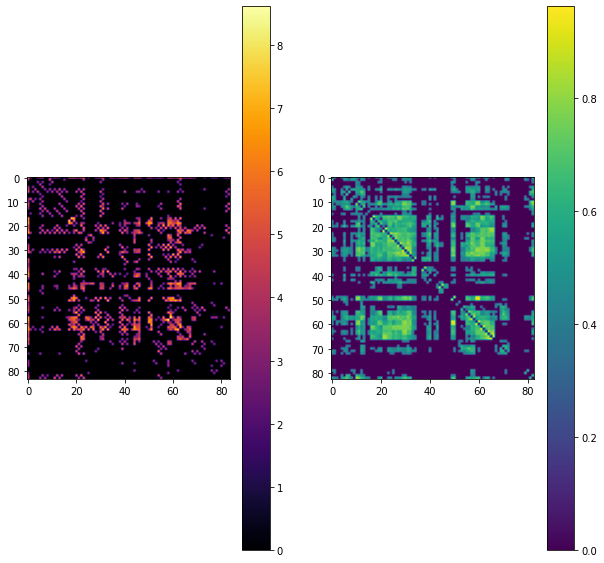

In [ ]:
#Definamos el threshold que se le aplicará a las matrices
estructural_threshold = 3
funcional_threshold = 0.4

#apliquemos el threshold
estruc = estructural*(estructural > estructural_threshold)
func = funcional*(funcional > funcional_threshold)
#ploteemos
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(estruc,cmap = "inferno")
plt.colorbar()
plt.subplot(122)
plt.imshow(func)
plt.colorbar()


In [ ]:
#creamos el grafo y removemos los selfloops y la parcela nula
g = nx.convert_matrix.from_numpy_array(estruc)
g.remove_node(0)
g.remove_edges_from(nx.selfloop_edges(g))

In [ ]:
#Normalicemos la graf estructural
maximo = np.max(estruc)
estruc = estruc/maximo

#%% Ahora establezcamos y guardemos la condición inicial
# Creemos el estado inicial del sistema aleatoriamente
for i in g.nodes():
  g.nodes[i]['state'] = 1 if random.random()< 0.5 else -1
#Creemos y guardemos una lista con las condiciones iniciales
prueba2 = []
for i in g.nodes():
    prueba2.append([g.nodes[i]["state"]])
with open("initial_condition.bin","wb") as output:
    pickle.dump(prueba2,output)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.7

"\n# Transpongamos el array para usar la función de nilearn connectome\nl = w\ntrans = list(map(list, zip(*l)))\n# creemos la matriz de correlaciones con nilearn\nfrom nilearn import connectome\n#creamos la función para correlación\ncorrelation_measure = connectome.ConnectivityMeasure(kind='correlation')\n\n#creamos las matrices usando la función\ntrans = np.array(trans) #hagamos un array de la lista donde estan las series de tiempo transpuestas\nsimulation_matrix = correlation_measure.fit_transform([trans])\nsimulation_matrix = simulation_matrix[0]\n\n#hagamos la diagonal 0\nfor i in range(1,len(simulation_matrix)):\n  simulation_matrix[i][i] = 0\n\n\n#grafiquemos la matriz simulada\nplt.figure()kug\nplt.imshow(simulation_matrix,vmin = -0.1, vmax = 1)\nplt.colorbar()\n"

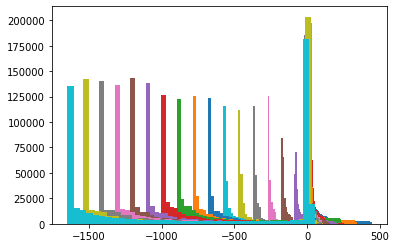

In [ ]:

#AQUI EJECUTAMOS EL METROPOLIS - HASTING
#%% Cargemos las condiciones iniciales y exploremos los posibles estados
#cargemos las condiciones iniciales en la lista w
with open("initial_condition.bin","rb") as data:
    w = pickle.load(data)
#carguemos el estado de los nodos acorde a las condiciones iniciales cargadas
for i in range(83):
    g.nodes[i+1]['state'] = w[i][0]

#Vemos la variacion de la entropia con el parámetro de acople    
parametro_w = 0
iteraciones = 500000 #numero de iteraciones
energias = np.zeros(iteraciones)


"""
for i in range (20):
  parametro_w = 3 
  energias = metropolis(g, iteraciones, parametro_w, estruc)
  plt.hist(energias)  
"""

#AlGORITMO METROPOLIS INICIO

temperatura_t = 1
tetha = 12
w_l = []
entropia_l = []
seriess = []
no_considerar = 30000
for parametro_w in range(0,20):
  puntos_w = 0.2 + 0.4*parametro_w    
  energias,series = metropolis(g, iteraciones, puntos_w, estruc, temperatura_t, no_considerar)
  cal_entropia = calculo_entropia(energias,iteraciones - no_considerar)
  plt.hist(energias, bins=40)
  w_l.append(puntos_w)
  entropia_l.append(cal_entropia)
  seriess.append(series)

#AlGORITMO METROPOLIS FIN

"""
# Transpongamos el array para usar la función de nilearn connectome
l = w
trans = list(map(list, zip(*l)))
# creemos la matriz de correlaciones con nilearn
from nilearn import connectome
#creamos la función para correlación
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')

#creamos las matrices usando la función
trans = np.array(trans) #hagamos un array de la lista donde estan las series de tiempo transpuestas
simulation_matrix = correlation_measure.fit_transform([trans])
simulation_matrix = simulation_matrix[0]

#hagamos la diagonal 0
for i in range(1,len(simulation_matrix)):
  simulation_matrix[i][i] = 0


#grafiquemos la matriz simulada
plt.figure()kug
plt.imshow(simulation_matrix,vmin = -0.1, vmax = 1)
plt.colorbar()
"""


In [ ]:
plt.plot(w_l,entropia_l)
print(w_l)
print(entropia_l)

[0.2, 0.6000000000000001, 1.0, 1.4000000000000001, 1.8, 2.2, 2.6000000000000005, 3.0000000000000004, 3.4000000000000004, 3.8000000000000003, 4.2, 4.6000000000000005, 5.000000000000001, 5.4, 5.800000000000001, 6.2, 6.6000000000000005, 7.000000000000001, 7.4, 7.800000000000001]
[3.545646937200764, 3.600569825988467, 3.7272216485294387, 3.722703834374395, 3.8542237568949935, 3.5519925029712702, 3.2711770045245805, 3.3121296192223424, 3.2726971403785976, 3.3095552673268087, 3.430396413837022, 3.4515520552799925, 3.585681292649873, 3.4029906930632294, 3.204443972900135, 2.8945305918734907, 3.115543129322578, 3.0688371421398064, 2.880220955188364, 2.9274839307419156]


In [ ]:
timeseries = np.array(seriess)
print(len(timeseries))

In [ ]:
d = entropia_l.index(min(entropia_l))
print(d)

In [ ]:
num = entropia_l.index(max(entropia_l))
# Transpongamos el array para usar la función de nilearn connectome
print(w_l[num])
l = timeseries[num]
trans = list(map(list, zip(*l)))
# creemos la matriz de correlaciones con nilearn
from nilearn import connectome
#creamos la función para correlación
correlation_measure = connectome.ConnectivityMeasure(kind='correlation')

#creamos las matrices usando la función
trans = np.array(trans) #hagamos un array de la lista donde estan las series de tiempo transpuestas
simulation_matrix = correlation_measure.fit_transform([trans])
simulation_matrix = simulation_matrix[0]

#hagamos la diagonal 0
for i in range(1,len(simulation_matrix)):
  simulation_matrix[i][i] = 0


#grafiquemos la matriz simulada
plt.figure()
plt.imshow(simulation_matrix,vmin = -0.1, vmax = 1)
plt.colorbar()


In [ ]:
diferencia = np.abs(funcional - simulation_matrix)
suma1 = np.sum(np.abs(funcional))
suma2 = np.sum(np.abs(simulation_matrix))
suma3 = np.sum(diferencia)
print(suma3*100/suma1)
print(100*(suma1-suma2)/suma1)

cmap = plt.cm.inferno
plt.imshow(diferencia,vmin = 0.0, vmax = 1.0, cmap=cmap)
plt.colorbar()
plt.figure()

suma = 0

for i in range(len(diferencia)):
    suma = suma + np.sum(abs(diferencia[i][j]) for j in range(len(diferencia[i])))
print(suma)
print((np.var(diferencia))**(1/2),"desviación estándar")
print(np.mean(diferencia),"promedio")

In [ ]:
def function(x):
  return [45,x], [46*x,x]

a, b = function(5)
print(a,b)